<a href="https://colab.research.google.com/github/Michel850101/Python/blob/main/EAN_Grupo_4_Taller_1_(Resultado_Limpieza).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # __Universidad EAN: Facultad de Ingenieria - Posgrados__
 ### **Programación para Ciencia de Datos - Grupo 4**

*   Carlos Mauricio Arteaga Bermudez
*   Juan Sebastian Lozano Forero
*   Michel Stivens Larrota Villalba
*   Miguel Ángel Pablos Perea
*   Wilber Alexander Rodriguez Castro

# ¿Cómo podemos controlar el creciente número de accidentes en Nueva York?

In [101]:
# Se realiza la carga de las librerias que serán usadas en los ejercicios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
##!pip install unidecode
##from unidecode import unidecode

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (almacenado en la carpeta ```datos``` ya creada) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado `,`. Realizará las siguientes tareas con los datos:

1. Extraiga datos adicionales del municipio almacenados en un archivo JSON
2. Leer, transformar y preparar datos para su visualización
3. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Obteniendo los datos relevantes

El cliente ha solicitado un análisis de la relación accidentes-área de los distritos. Los datos del municipio se almacenan en un archivo JSON en la carpeta ```datos```.

### Question (5 min):

Utilice la función ```json.load()``` para cargar el archivo ```borough_data.json``` como diccionario.

**Answer.**

In [102]:
#Se realiza la carga de información del archivo JSON como un diccionario
diccionario = json.load(open('/content/borough_data.json'))
diccionario

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

### Question (5 min):
De manera similar, use la función pandas ```read_csv()``` para cargar el archivo ```accidentes.csv``` como un DataFrame. Nombra este DataFrame ```df```.


**Answer.**

In [103]:
#Se carga la información del archivo con extención CSV en un DataFrame para su postario análisis, como evidencia se imprimen losm primeros 5 registros
df = pd.read_csv("/content/accidents.csv", sep=';')
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [104]:
df_c = df.copy()

In [105]:
def limpieza_de_texto (df: pd.DataFrame, column_name: str):
  df_c[column_name] = df_c[column_name].astype(str)  #Convierte a string
  df_c[column_name] = df_c[column_name].str.normalize('NFC')  #Elimina acentos
  ##df_c[column_name] = df_c[column_name].apply(unidecode)  #Elimina acentos
  ##df_c[column_name] = df_c[column_name].replace(r'[^A-Z0-9.\/\s]', '', regex=True)  #Remplaza los caracteres especiales
  df_c[column_name] = df_c[column_name].str.upper() #Convierte los textos en mayusculas
  ##df_c[column_name] = df_c[column_name].str.lower() #Convierte los textos en minusculas
  df_c[column_name] = df_c[column_name].str.strip() #Elimina espacios al inicio y al final de los textos
  return df_c

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATE                           238522 non-null  object 
 1   TIME                           238522 non-null  object 
 2   BOROUGH                        238522 non-null  object 
 3   ZIP CODE                       238452 non-null  float64
 4   LATITUDE                       231544 non-null  float64
 5   LONGITUDE                      231544 non-null  float64
 6   ON STREET NAME                 153918 non-null  object 
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64  
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64  
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64  
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64  
 11  NUMBER OF MOTORIST INJURED     238522 non-null  int64  
 12  NUMBER OF MOTORIST KILLED     

In [107]:
limpieza_de_texto(df, 'BOROUGH')
limpieza_de_texto(df, 'ON STREET NAME')
limpieza_de_texto(df, 'CONTRIBUTING FACTOR VEHICLE 1')
limpieza_de_texto(df, 'CONTRIBUTING FACTOR VEHICLE 2')
limpieza_de_texto(df, 'CONTRIBUTING FACTOR VEHICLE 3')
limpieza_de_texto(df, 'CONTRIBUTING FACTOR VEHICLE 4')
limpieza_de_texto(df, 'CONTRIBUTING FACTOR VEHICLE 5')
limpieza_de_texto(df, 'VEHICLE TYPE CODE 1')
limpieza_de_texto(df, 'VEHICLE TYPE CODE 2')
limpieza_de_texto(df, 'VEHICLE TYPE CODE 3')
limpieza_de_texto(df, 'VEHICLE TYPE CODE 4')
limpieza_de_texto(df, 'VEHICLE TYPE CODE 5')

#for i in df.columns:
#  df = limpieza_de_texto(df, i)

In [108]:
df_c

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NAN,0,0,0,...,NAN,NAN,NAN,NAN,3988123,SEDAN,NAN,NAN,NAN,NAN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.91251,FLATLANDS AVENUE,1,0,0,...,NAN,NAN,NAN,NAN,3987962,SEDAN,NAN,NAN,NAN,NAN
2,08/22/2019,19:30,QUEENS,11101.0,40.75549,-73.93953,NAN,0,0,0,...,NAN,NAN,NAN,NAN,4193132,SEDAN,NAN,NAN,NAN,NAN
3,09/23/2018,13:10,QUEENS,11367.0,NAN,NAN,MAIN STREET,0,0,1,...,UNSPECIFIED,NAN,NAN,NAN,3985962,BIKE,STATION WAGON/SPORT UTILITY VEHICLE,NAN,NAN,NAN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.90127,NAN,0,0,0,...,UNSPECIFIED,NAN,NAN,NAN,4192111,SEDAN,SEDAN,NAN,NAN,NAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.79723,LINDEN BOULEVARD,0,0,0,...,UNSPECIFIED,NAN,NAN,NAN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NAN,NAN,NAN
238518,01/04/2018,14:00,BRONX,10452.0,40.84518,-73.91417,JEROME AVENUE,0,0,0,...,NAN,NAN,NAN,NAN,3822315,SPORT UTILITY / STATION WAGON,NAN,NAN,NAN,NAN
238519,01/20/2018,13:05,BRONX,10462.0,40.83121,-73.850876,CASTLE HILL AVENUE,0,0,0,...,UNSPECIFIED,NAN,NAN,NAN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NAN,NAN,NAN
238520,01/29/2018,17:45,QUEENS,11377.0,40.75725,-73.904854,31 AVENUE,0,0,0,...,UNSPECIFIED,NAN,NAN,NAN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NAN,NAN,NAN


## Overview de la data

Analizemos las columnas presentes en el data frame

Tenemos las siguientes columnas

1. **BOROUGH**: el municipio en el que ocurrió el accidente
2. **COLLISION_ID**: un identificador único para esta colisión
3. **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)**: Motivos del accidente
4. **CROSS STREET NAME**: Calle transversal más cercana al lugar del accidente
5. **DATE**: Fecha del accidente
6. **TIME**: Hora del accidente
7. **LATITUDE**: Latitud del accidente
8. **LONGITUDE**: Longitud del accidente
9. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED**: Lesión por categoría
10. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS**: Categoría muerte sabia
11. **ON STREET NAME**: Calle donde ocurrió el accidente
13. **VEHICLE TYPE CODE(1, 2, 3, 4, 5)**: Tipos de vehículos involucrados en el accidente
14. **ZIP CODE**: código postal del lugar del accidente

### Exercise 1 (30 min):

Desde 2014, la ciudad de Nueva York ha estado implementando un plan de seguridad vial llamado [Vision Zero](https://www1.nyc.gov/content/visionzero/pages/). Su objetivo es reducir el número de muertes por accidentes de tránsito a *cero* para fines de 2024. El plan está creando nuevas y mejorando las medidas de seguridad actuales, algunas de ellas incluyen:

- [X] Detección de peatones automatizada
- [X] Auditorías de seguridad vial en lugares de alto riesgo
- [X] Ampliación de la red de carriles bici
- [X] Iniciativas específicas de educación y sensibilización
- [X] Creación de islas de refugio peatonal
- [X] Lanzamiento del programa integrado de reductor de velocidad basado en datos (topes y amortiguadores de velocidad)

¿Cuáles de estas iniciativas podrían beneficiarse directamente de un análisis de los datos proporcionados? Marque todo lo que corresponda.

**Nota:** Puede crear marcas de verificación haciendo doble clic en esta celda y agregando una ```[x]``` en las líneas correspondientes.

Sigamos adelante y respondamos a cada una de las preguntas del cliente.

## Respondiendo las preguntas del cliente

### Exercise 2 (30 min):

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.

**Answer.**

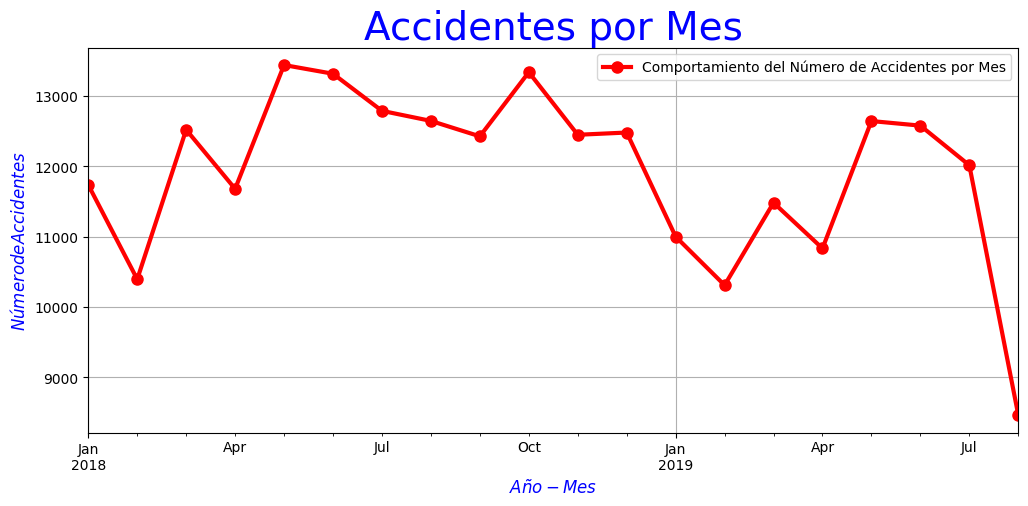

In [81]:
#Se cargan los datos en la columna DATE como tipo fecha
df['DATE'] = pd.to_datetime(df['DATE'])
#Se cargan en la columna mes los resultados de los totales por mes de la columna DATE
df['MONTH'] = df['DATE'].dt.to_period('M')
#Se agrupan los datos mensualmente y se presentan en una grafica lineal
df_accidents_per_month = df.groupby('MONTH')['COLLISION_ID'].count().plot(color='red', linewidth=3, marker='o', markersize=8, label='Comportamiento del Número de Accidentes por Mes', figsize=(12, 5))
font = {'family':'serif','color':'blue','size':12}
plt.title('Accidentes por Mes',size=28, color='b')
plt.xlabel('$Año - Mes$', fontdict=font)
plt.ylabel('$Número de Accidentes$', fontdict=font)
plt.legend()
plt.grid()

In [82]:
#Se establene los promedios con la información disponible para establecer el comportamiento de los datos en el último año y medio
df["MES"] = df["DATE"].dt.to_period("M")
df["MES"]
accidentes_mes = df.groupby("MES").size()

# Filtrar los últimos 18 meses
Ultimos_18_meses = accidentes_mes [-18:]

# Filtrar los 18 meses anteriores
Mes36__19meses = accidentes_mes [-36:-18]

# Calcular las medias de los dos períodos
Promedio_ultimos_18_meses = Ultimos_18_meses.mean()
Promedio_mes36__19meses = Mes36__19meses.mean()

print(f"Promedio de accidentes en los últimos 18 meses: \033[96m{round(Promedio_ultimos_18_meses,1)}\033[0m\n")
print(f"Promedio de accidentes en los 18 meses anteriores: \033[96m{round(Promedio_mes36__19meses,1)}\033[0m\n")

if Promedio_ultimos_18_meses > Promedio_mes36__19meses:
    print("El número de accidentes \033[91mha aumentado\033[0m en el último año y medio.")
else:
    print("El número de accidentes \033[91mno ha aumentado\033[0m en el último año y medio.")

Promedio de accidentes en los últimos 18 meses: 12021.8

Promedio de accidentes en los 18 meses anteriores: 11065.0

El número de accidentes ha aumentado en el último año y medio.


 ### **Respuesta**
El gráfico de líneas que trazamos muestra claramente que existen varios puntos en el tiempo en donde se observa un crecimiento importante en el número de accidentes como fueron los meses de mayo, junio y agosto de 2018 cuyos registros fueron superiores a los 13.000 accidentes reportados como se puede observar en la gráfica.

### Exercise 3 (15 min):

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

In [83]:
#Se agrupian los resultados por mes y se organizan para obtener los meses con menor registro de accidentes
sm = df.groupby(by='MONTH')['TIME'].count()
serie_mensual = sm.sort_values(ascending=True)
serie_mensual.head(3)

,TIME
MONTH,
2019-08,8466
2019-02,10310
2018-02,10395


 ### **Respuesta**
*   De la grafica anterior es posible observar que los 3 meses que registran menor valor son el mes de agosto de 2019 con 8.466 registros, el mes de febrero de 2019 con 10.310 registros, el mes de febrero de 2018 con 10.395.

*   Las razones que consideramos sustentan esta situación son muchas cosas.

### Exercise 4 (30 min):
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

**Answer.**

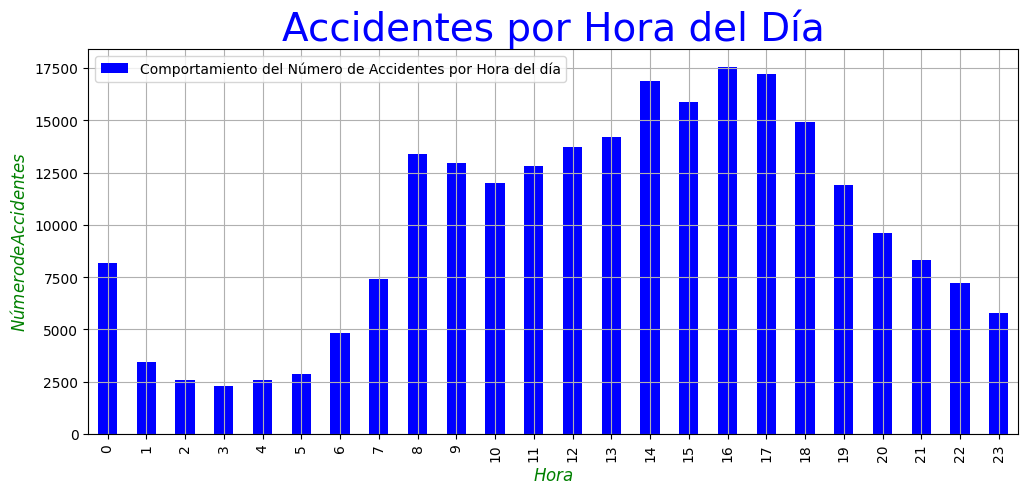

In [84]:
#Se carga en la columna HORA los valores correspondientes a la hora
df['HOUR'] = pd.to_datetime(df['TIME'],format='%H:%M').dt.hour
#Se agrupan y se cuenta el número de accidentes por hora del día y se genera la respectiva gráfica
df.groupby(by='HOUR')['TIME'].count().plot.bar(color='blue', linewidth=3, label='Comportamiento del Número de Accidentes por Hora del día', figsize=(12, 5))
font = {'family':'serif','color':'green','size':12}
plt.title('Accidentes por Hora del Día',size=28, color='b')
plt.xlabel('$Hora$', fontdict=font)
plt.ylabel('$Número de Accidentes$', fontdict=font)
plt.legend()
plt.grid()
plt.show()

 ### **Respuesta**

Se observa una ventana de tiempo entre las 8 horas y las 19 horas donde se presentan los mayores registros de accidentabilidad, esto podrian asociarse a los tiempos en que toda urbe presenta los mayores volumenes de congestión vehícular, lo que deriva en una mayor probabilidad de presentar accidentes en esa ventana de tiempo.

### Exercise 5 (15 min):

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

 ### **Respuesta**
*   Frente al análisis que podemos obtener de la gráfica, se podría enfocar en la hora en la que más se tendría demanda de servicios asociados a los accidentes que son reportados en esta muestra de información, pero al no contar con las variables de fecha completa y lugar de los hechos se limitaría cualquier operacionalización de los datos que permitan dar una solución materializable para el dueño de la información ya que no se contaria con una variable de tiempo que permita establecer temas como el día de la semana que presenta con mayor frecuencia estas situaciones, así como la ubicación de los accidentes para contar con una reacción oportuna frente a la ocurrencia de los mismos, a la hora de establecer una acción operativa frente a los datos pudieran ser analizados si se contara con estas variables.

*   En la agrupacion horaria tenemos encuenta todos los dias, sin tener en cuenta dias festivos, por ejemplo no todos los dias tienen el mismo patron de trafico. dias laborales vs fines de semana.

*   El componente estacional y clima puede ser un factor que influya en los resultados de la distribucion.

*   La distribucion de accidentes esta representada en su totalidad, habria que hacer zoom por los diferentes barrios (the bronx brooklyn manhattan queens staten island) para ver si la distribucion de los datos y la tendencia es igual en cada barrio analizado.

### Exercise 6 (15 min):

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

**Answer.**

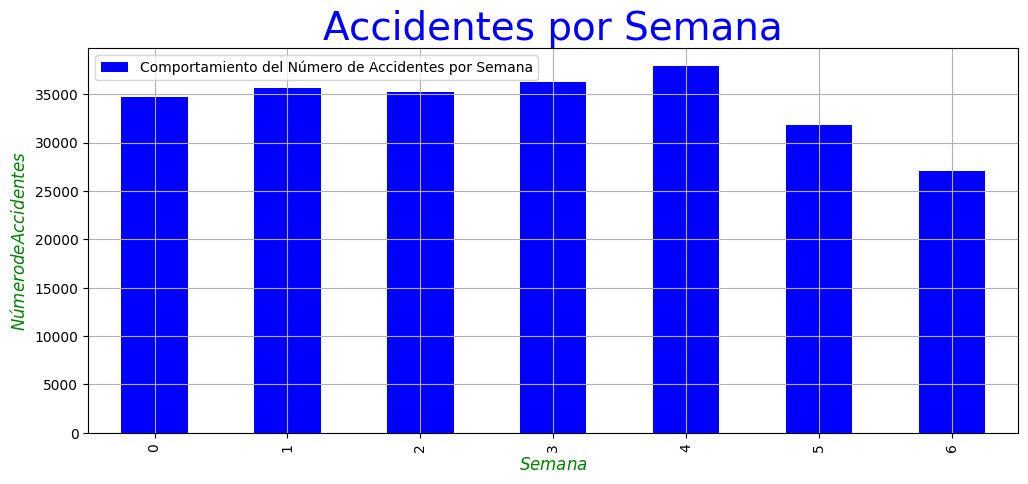

In [85]:
#Se establecen los valores por día de la semana
df['SEMANA'] = pd.to_datetime(df['DATE']).dt.weekday
#Se agrupan los resultados por día de la semana y se grafica en diagrama de barras.
df.groupby(by='SEMANA')['TIME'].count().plot.bar(color='blue', linewidth=3, label='Comportamiento del Número de Accidentes por Semana', figsize=(12, 5))
font = {'family':'serif','color':'green','size':12}
plt.title('Accidentes por Semana',size=28, color='b')
plt.xlabel('$Semana$', fontdict=font)
plt.ylabel('$Número de Accidentes$', fontdict=font)
plt.legend()
plt.grid()

In [86]:
df['SEMANA'] = pd.to_datetime(df['DATE']).dt.day_name()
day = df.groupby(by='SEMANA')['TIME'].count()
serie_mensual = day.sort_values(ascending=False)
serie_mensual.head(7)

,TIME
SEMANA,
Friday,37886
Thursday,36254
Tuesday,35651
Wednesday,35188
Monday,34719
Saturday,31784
Sunday,27040


Como se visualiza en los datos listados con anterioridad el día número "4 o Friday" es el que presenta el mayor volumen de acidentabilidad, representando un total de 37.886 accidentes , lo que equivale al 18% del total de la muestra de datos analizada.

### Exercise 7 (30 min):

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

**Answer.**

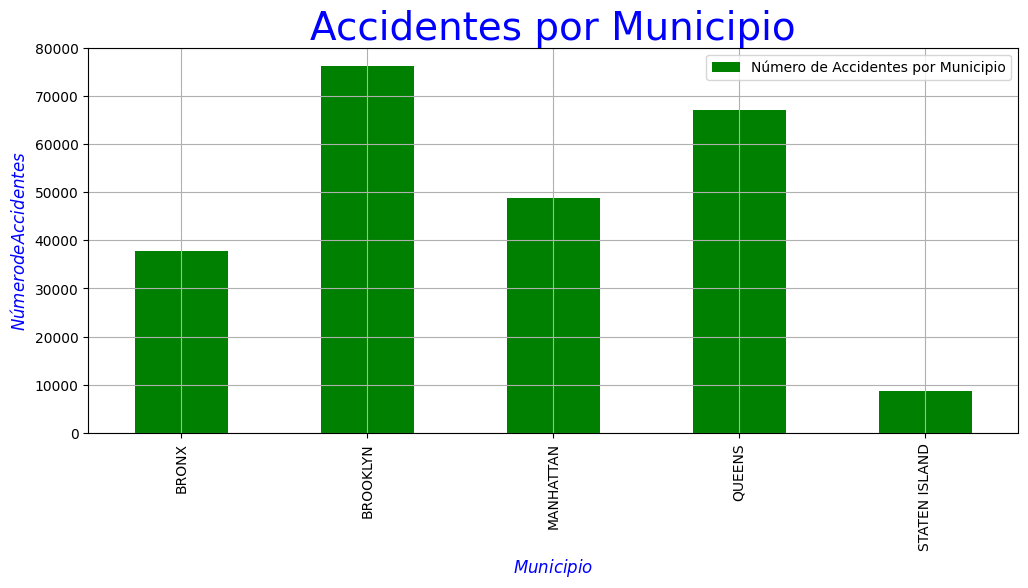

In [87]:
#Se realiza la agrupación de resultados por municipio y se grafican los resultados
df.groupby(by='BOROUGH')['TIME'].count().plot.bar(color='green', linewidth=3, label='Número de Accidentes por Municipio', figsize=(12, 5))
font = {'family':'serif','color':'blue','size':12}
plt.title('Accidentes por Municipio',size=28, color='b')
plt.xlabel('$Municipio$', fontdict=font)
plt.ylabel('$Número de Accidentes$', fontdict=font)
plt.legend()
plt.grid()
plt.show()

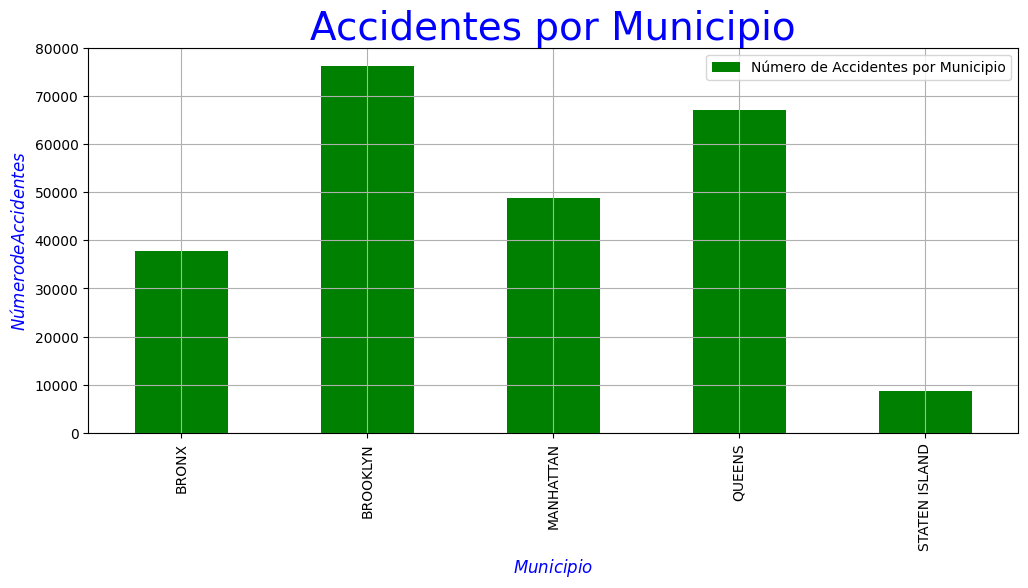

In [88]:
#Se realiza la agrupación de resultados por municipio y se grafican los resultados
df_c.groupby(by='BOROUGH')['TIME'].count().plot.bar(color='green', linewidth=3, label='Número de Accidentes por Municipio', figsize=(12, 5))
font = {'family':'serif','color':'blue','size':12}
plt.title('Accidentes por Municipio',size=28, color='b')
plt.xlabel('$Municipio$', fontdict=font)
plt.ylabel('$Número de Accidentes$', fontdict=font)
plt.legend()
plt.grid()
plt.show()

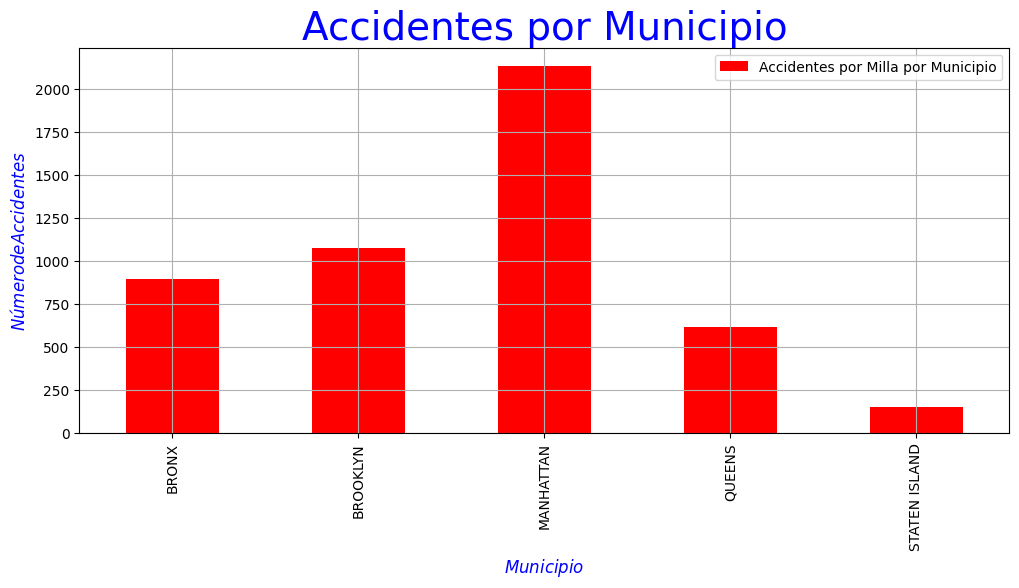

In [89]:
#Se almacena en Dataframe el resultado de la agrupación de datos por municipio
df_2 = df.groupby(by='BOROUGH')['TIME'].count()
#Se genera replicación del diccionario ya se van a alterar su contenido
diccionario_2 = diccionario.copy()
#Se ajustan los valores de las llaves para determinar un factor comun entre el Dataframe y el diccionario
diccionario_2['the bronx']['name'] = 'BRONX'
diccionario_2['brooklyn']['name'] = 'BROOKLYN'
diccionario_2['manhattan']['name'] = 'MANHATTAN'
diccionario_2['queens']['name'] = 'QUEENS'
diccionario_2['staten island']['name'] = 'STATEN ISLAND'
diccionario_2['total'] = df_2
# Se asignan los valores de área
diccionario_2['area'] = {
    'BRONX': 42.10,
    'BROOKLYN': 70.82,
    'MANHATTAN': 22.83,
    'QUEENS': 108.53,
    'STATEN ISLAND': 58.37
}
# Se calcula el valor del total de accidentes sobre las millas cuadradas que conforman los municipios de la muestra de información
diccionario_2['milla'] = diccionario_2['total'] / diccionario_2['total'].index.map(diccionario_2['area'])
diccionario_2['milla'].plot.bar(color='red', linewidth=3, label='Accidentes por Milla por Municipio', figsize=(12, 5))
font = {'family':'serif','color':'blue','size':12}
plt.title('Accidentes por Municipio',size=28, color='b')
plt.xlabel('$Municipio$', fontdict=font)
plt.ylabel('$Número de Accidentes$', fontdict=font)
plt.legend()
plt.grid()
plt.show()

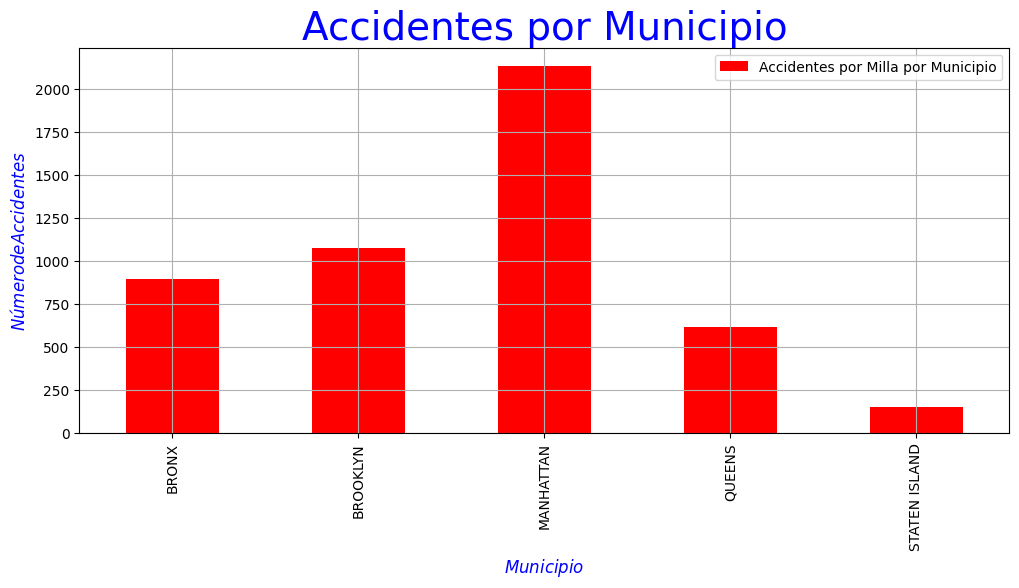

In [90]:
#Se almacena en Dataframe el resultado de la agrupación de datos por municipio
df_2 = df_c.groupby(by='BOROUGH')['TIME'].count()
#Se genera replicación del diccionario ya se van a alterar su contenido
diccionario_2 = diccionario.copy()
#Se ajustan los valores de las llaves para determinar un factor comun entre el Dataframe y el diccionario
diccionario_2['the bronx']['name'] = 'BRONX'
diccionario_2['brooklyn']['name'] = 'BROOKLYN'
diccionario_2['manhattan']['name'] = 'MANHATTAN'
diccionario_2['queens']['name'] = 'QUEENS'
diccionario_2['staten island']['name'] = 'STATEN ISLAND'
diccionario_2['total'] = df_2
# Se asignan los valores de área
diccionario_2['area'] = {
    'BRONX': 42.10,
    'BROOKLYN': 70.82,
    'MANHATTAN': 22.83,
    'QUEENS': 108.53,
    'STATEN ISLAND': 58.37
}
# Se calcula el valor del total de accidentes sobre las millas cuadradas que conforman los municipios de la muestra de información
diccionario_2['milla'] = diccionario_2['total'] / diccionario_2['total'].index.map(diccionario_2['area'])
diccionario_2['milla'].plot.bar(color='red', linewidth=3, label='Accidentes por Milla por Municipio', figsize=(12, 5))
font = {'family':'serif','color':'blue','size':12}
plt.title('Accidentes por Municipio',size=28, color='b')
plt.xlabel('$Municipio$', fontdict=font)
plt.ylabel('$Número de Accidentes$', fontdict=font)
plt.legend()
plt.grid()
plt.show()

##Bonus

Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

**Answer**

In [91]:
#Se presenta el resultado de la orgtanización asendente de los datos obtenido a partir del calculo realizado
print(round(diccionario_2['milla'].sort_values(ascending=False), 2))

BOROUGH
MANHATTAN        2135.30
BROOKLYN         1076.72
BRONX             895.70
QUEENS            618.45
STATEN ISLAND     148.89
dtype: float64


 ### **Respuesta**
Con los resultados obtenidos es posible determinar que existe un mayor número de accidentes por milla cuadrada en el municipio de MANHATTAN, a pesar de que existen municipios con un mayor número de accidentes pero estos cuentan con un mayor número de millas, lo que implica que existe una mayor concentración de accidentabilidad por milla cuadrada en este municipio.

### Exercise 8 (30 min):

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

**Answer.**

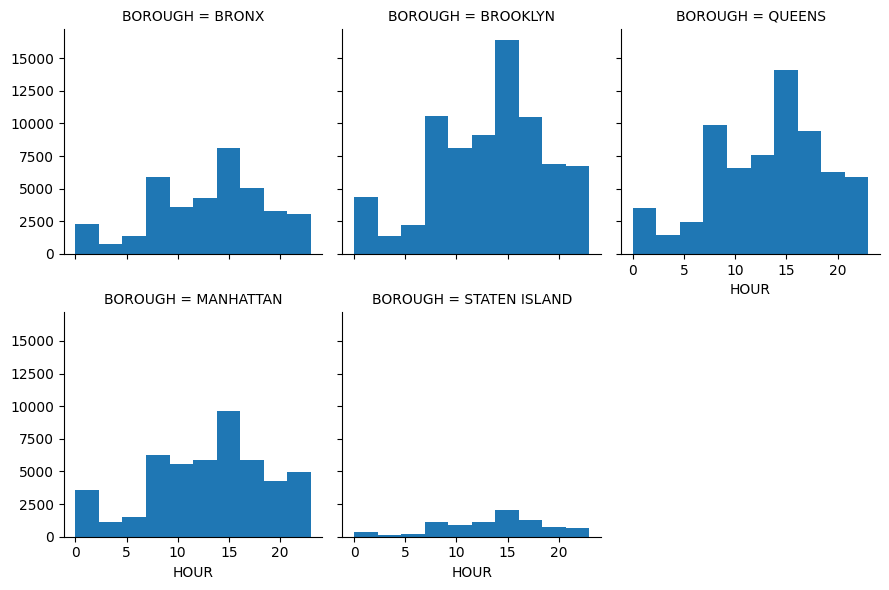

In [92]:
#Se carga la libreria que es requeria para poder graficar los datos
import seaborn as sns
#Se carga el DataFrame y se generan las imagenes por la dimensión establecida en el codigo, en este caso "3"
accidentes_municipio = sns.FacetGrid(df, col="BOROUGH", col_wrap=(3))
#Se carga la información de cada cuadrícula de parcelas
accidentes_municipio.map(plt.hist, "HOUR")
plt.show()

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

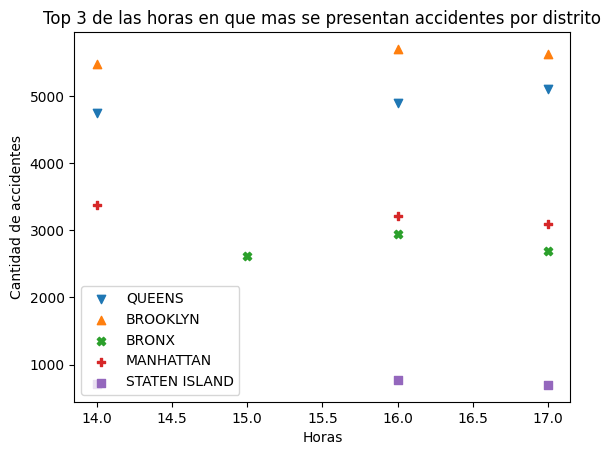

In [93]:
#Se organizan los datos por cada uno de los municipios
BRONH = df[df['BOROUGH'] == 'BRONX'].groupby(by='HOUR')['TIME'].count().sort_values(ascending = False).head(3)
BROOH = df[df['BOROUGH'] == 'BROOKLYN'].groupby(by='HOUR')['TIME'].count().sort_values(ascending = False).head(3)
QUEEH = df[df['BOROUGH'] == 'QUEENS'].groupby(by='HOUR')['TIME'].count().sort_values(ascending = False).head(3)
MANHH = df[df['BOROUGH'] == 'MANHATTAN'].groupby(by='HOUR')['TIME'].count().sort_values(ascending = False).head(3)
STATH = df[df['BOROUGH'] == 'STATEN ISLAND'].groupby(by='HOUR')['TIME'].count().sort_values(ascending = False).head(3)
#Se asignana valores de control grafico
plt.scatter(QUEEH.index, QUEEH.values, marker='v')
plt.scatter(BROOH.index, BROOH.values, marker='^')
plt.scatter(BRONH.index, BRONH.values, marker='X')
plt.scatter(MANHH.index, MANHH.values, marker='P')
plt.scatter(STATH.index, STATH.values, marker='s')
#Se establcen las etiquetas a las preguntas generadas
plt.xlabel('Horas')
plt.ylabel('Cantidad de accidentes')
plt.title('Top 3 de las horas en que mas se presentan accidentes por distrito')
plt.legend(['QUEENS', 'BROOKLYN', 'BRONX', 'MANHATTAN', 'STATEN ISLAND'])
plt.show()

### Exercise 9 (45 min):

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

**Answer**.



In [94]:
#Establecer un DataFrame en donde se concatenan las columnas relacionadas a las razones del accidente, estas se atan a un identificador 'COLLISION_ID' para posteriormente eliminar valores duplicados
df_factor_concat = pd.concat([
    df[['COLLISION_ID', 'CONTRIBUTING FACTOR VEHICLE 1']].rename(columns={'CONTRIBUTING FACTOR VEHICLE 1': 'FACTOR'}),
    df[['COLLISION_ID', 'CONTRIBUTING FACTOR VEHICLE 2']].rename(columns={'CONTRIBUTING FACTOR VEHICLE 2': 'FACTOR'}),
    df[['COLLISION_ID', 'CONTRIBUTING FACTOR VEHICLE 3']].rename(columns={'CONTRIBUTING FACTOR VEHICLE 3': 'FACTOR'}),
    df[['COLLISION_ID', 'CONTRIBUTING FACTOR VEHICLE 4']].rename(columns={'CONTRIBUTING FACTOR VEHICLE 4': 'FACTOR'}),
    df[['COLLISION_ID', 'CONTRIBUTING FACTOR VEHICLE 5']].rename(columns={'CONTRIBUTING FACTOR VEHICLE 5': 'FACTOR'})
])
df_factor_concat_clean = df_factor_concat.dropna().drop_duplicates() #Eliminanos de el nuevo DataFrame los valores Nan y los valores duplicados
df_factor_values = df_factor_concat_clean['FACTOR'].value_counts() #Contamos la cantidad de cada valor en la variable df_factor_values
tot = df_factor_values.head(10)

print(f'Este es el top 10 de factores que ocacionan accidentes en {tot} ')

Este es el top 10 de factores que ocacionan accidentes en FACTOR
Unspecified                       190096
Driver Inattention/Distraction     61752
Failure to Yield Right-of-Way      19641
Following Too Closely              17293
Backing Unsafely                   14835
Passing Too Closely                12631
Passing or Lane Usage Improper     11808
Other Vehicular                     8860
Unsafe Lane Changing                6643
Turning Improperly                  6626
Name: count, dtype: int64 


In [95]:
#Establecer un DataFrame en donde se concatenan las columnas relacionadas a las razones del accidente, estas se atan a un identificador 'COLLISION_ID' para posteriormente eliminar valores duplicados
df_factor_concat = pd.concat([
    df_c[['COLLISION_ID', 'CONTRIBUTING FACTOR VEHICLE 1']].rename(columns={'CONTRIBUTING FACTOR VEHICLE 1': 'FACTOR'}),
    df_c[['COLLISION_ID', 'CONTRIBUTING FACTOR VEHICLE 2']].rename(columns={'CONTRIBUTING FACTOR VEHICLE 2': 'FACTOR'}),
    df_c[['COLLISION_ID', 'CONTRIBUTING FACTOR VEHICLE 3']].rename(columns={'CONTRIBUTING FACTOR VEHICLE 3': 'FACTOR'}),
    df_c[['COLLISION_ID', 'CONTRIBUTING FACTOR VEHICLE 4']].rename(columns={'CONTRIBUTING FACTOR VEHICLE 4': 'FACTOR'}),
    df_c[['COLLISION_ID', 'CONTRIBUTING FACTOR VEHICLE 5']].rename(columns={'CONTRIBUTING FACTOR VEHICLE 5': 'FACTOR'})
])
df_factor_concat_clean = df_factor_concat.dropna().drop_duplicates() #Eliminanos de el nuevo DataFrame los valores Nan y los valores duplicados
df_factor_values = df_factor_concat_clean['FACTOR'].value_counts() #Contamos la cantidad de cada valor en la variable df_factor_values
tot = df_factor_values.head(10)

print(f'Este es el top 10 de factores que ocacionan accidentes en {tot} ')

Este es el top 10 de factores que ocacionan accidentes en FACTOR
NAN                               237730
UNSPECIFIED                       190096
DRIVER INATTENTION/DISTRACTION     61752
FAILURE TO YIELD RIGHT-OF-WAY      19641
FOLLOWING TOO CLOSELY              17293
BACKING UNSAFELY                   14835
PASSING TOO CLOSELY                12631
PASSING OR LANE USAGE IMPROPER     11808
OTHER VEHICULAR                     8860
UNSAFE LANE CHANGING                6643
Name: count, dtype: int64 


De acuerdo a la información obtenida se identifica que el factor con el mayor número de registros es el correspondiente a "Unspecified", siendo un valor indeterminado se toma como dato de mayor relevancia el segundo factor que concentra los datos obtenidos y que corresponde a "Driver Inattention/Distraction", siendo los conductores y su falta de atención o distracción los que generan el mayor número de accidentes.

### Exercise 10 (45 min):

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

**Answer.**

In [96]:
#Se genera una variable llamada "datos" la cual genera un columna llamada "tipo_vehiculo" que es
#resultado de concatenar por cada linea de la ciudad con los vehiculos implicados en cada accidente.
#adicional pone esta concatenación una encima de la otra para poder hacer la agrupación y el conteo final
datos = pd.concat([
    df[['VEHICLE TYPE CODE 1', 'BOROUGH']].rename(columns = {'VEHICLE TYPE CODE 1' : 'tipo_vehiculo'}),
    df[['VEHICLE TYPE CODE 2', 'BOROUGH']].rename(columns = {'VEHICLE TYPE CODE 2' : 'tipo_vehiculo'}),
    df[['VEHICLE TYPE CODE 3', 'BOROUGH']].rename(columns = {'VEHICLE TYPE CODE 3' : 'tipo_vehiculo'}),
    df[['VEHICLE TYPE CODE 4', 'BOROUGH']].rename(columns = {'VEHICLE TYPE CODE 4' : 'tipo_vehiculo'}),
    df[['VEHICLE TYPE CODE 5', 'BOROUGH']].rename(columns = {'VEHICLE TYPE CODE 5' : 'tipo_vehiculo'}),
                  ]).dropna().reset_index(drop = False)
# Se genera el gruopby para hacer el conteo y se aplica la funcion agg que hace un conteo
# por valores unicos y finalmente se ordena de mayor a menor
datos.groupby(['BOROUGH', 'tipo_vehiculo']).agg({'index':'nunique'}).sort_values(by = ['BOROUGH','index'], ascending=False)

index
BOROUGH       tipo_vehiculo                             
STATEN ISLAND Sedan                                 4773
              Station Wagon/Sport Utility Vehicle   3371
              PASSENGER VEHICLE                     1531
              SPORT UTILITY / STATION WAGON          904
              Pick-up Truck                          537
...                                                  ...
BRONX         unk                                      1
              unkno                                    1
              utili                                    1
              wagon                                    1
              work                                     1

[1370 rows x 1 columns]

El tipo de vehículo que más presento accidentalidad en todas las ciudades fue el Sedan, esto se explica con la relación de autos por persona en Estados Unidos, ya que según estudios, por cada 1000 habitantes hay 860 vehículos, cabe aclarar que en esos 860 no solamente hay sedan, pero si se puede concluir que por la accesibilidad económica, es el auto mas vendido. De acuerdo con lo anterior este es el porcentaje de distribución por ciudad de accidentes con Sedan: Brooklyn 39459; Queens 35103; Manhattan 20727; State Island 4773; Bronx 19652.

De segundo lugar en el ranking de vehículos con más accidentalidad se encuentran las camionetas y vehículos deportivos, y al igual que con los Sedan, la ciudad en la que más accidentes hubo fue en Brooklyn con 32262. Por último, en este ranking el tercer lugar se lo llevan los vehículos de pasajeros 10177 siendo Brooklyn en donde se registraron mas casos.

### Exercise 11 (15 min):

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [X] Ninguna de las anteriores. Haría lo siguiente: Como lo establece el enunciado, la información más relevante para este caso sería la ubicación geográfica del accidente, además de fecha y hora del evento, ya que estos datos nos permitirían determinar los lugares que presentan mayor volumen de accidentes, en específico con los que involucran a los ciclistas y peatones, así como establecer los tiempos para realizar procesos comparativos de datos entre el año 2018 y 2019.
De esta forma se podría ubicar la concentración de accidentes y en consecuencia las zonas que impactan en el incremento porcentual enunciado, así como la temporalidad de los eventos lo que podría entregar elementos para identificar acciones que pudieran desarrollarse en estos espacios, para mitigar las cifras de accidentabilidad obtenidas a la fecha en la ciudad.

### Exercise 12 (45 min):

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

**Answer.**

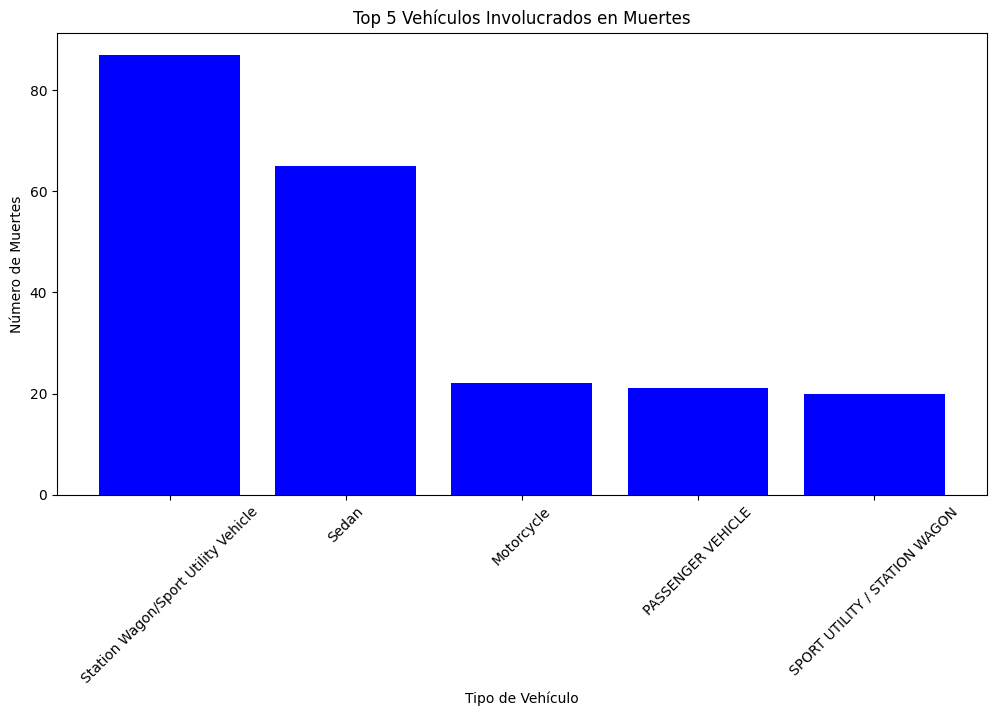

                                     Deaths
Station Wagon/Sport Utility Vehicle      87
Sedan                                    65
Motorcycle                               22
PASSENGER VEHICLE                        21
SPORT UTILITY / STATION WAGON            20


In [97]:
from collections import defaultdict
# Calcular el número total de muertes por accidente
df['TOTAL_DEATHS'] = df[['NUMBER OF PEDESTRIANS KILLED',
                         'NUMBER OF CYCLIST KILLED',
                         'NUMBER OF MOTORIST KILLED']].sum(axis=1)

# Crear una lista de las columnas de los tipos de vehículos
vehicle_columns = ['VEHICLE TYPE CODE 1',
                   'VEHICLE TYPE CODE 2',
                   'VEHICLE TYPE CODE 3',
                   'VEHICLE TYPE CODE 4',
                   'VEHICLE TYPE CODE 5']

# Diccionario para contar las muertes por tipo de vehículo
vehicle_deaths = defaultdict(int)

# Convertir columnas de tipos de vehículos a un array de NumPy
vehicle_data = df[vehicle_columns].to_numpy()

# Convertir la columna de muertes totales a un array de NumPy
total_deaths_data = df['TOTAL_DEATHS'].to_numpy()

# Iterar sobre los arrays
for i in range(len(vehicle_data)):
    total_deaths = total_deaths_data[i]
    # Convertir fila a conjunto de vehículos únicos, excluyendo nulos
    vehicles = set(filter(pd.notna, vehicle_data[i]))

    # Distribuir el número de muertes entre los vehículos involucrados
    for vehicle in vehicles:
        vehicle_deaths[vehicle] += total_deaths

# Convertir el diccionario a un DataFrame
vehicle_deaths_df = pd.DataFrame.from_dict(vehicle_deaths, orient='index', columns=['Deaths'])
vehicle_deaths_df = vehicle_deaths_df.sort_values(by='Deaths', ascending=False)

# Seleccionar los 5 vehículos principales
top_5_vehicles = vehicle_deaths_df.head(5)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.bar(top_5_vehicles.index, top_5_vehicles['Deaths'], color='b')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Muertes')
plt.title('Top 5 Vehículos Involucrados en Muertes')
plt.xticks(rotation=45)
plt.show()

# Mostrar los 5 vehículos principales
print(top_5_vehicles)

Station Wagon/Sport Utility Vehicle es el tipo de vehículo más involucrado en accidentes, con 87 muertes, lo que es significativamente más que los otros tipos de vehículos de acuerdo con el analisis. Comparado con el segundo más involucrado Sedan, hay 22 muertes más y para lo comparado con los otros vehículos "Motorcycle, PASSENGER VEHICLE, y SPORT UTILITY / STATION WAGON", la diferencia es de 65 a 67 muertes más.

In [109]:
from collections import defaultdict
# Calcular el número total de muertes por accidente
df_c['TOTAL_DEATHS'] = df_c[['NUMBER OF PEDESTRIANS KILLED',
                         'NUMBER OF CYCLIST KILLED',
                         'NUMBER OF MOTORIST KILLED']].sum(axis=1)

# Crear una lista de las columnas de los tipos de vehículos
vehicle_columns = ['VEHICLE TYPE CODE 1',
                   'VEHICLE TYPE CODE 2',
                   'VEHICLE TYPE CODE 3',
                   'VEHICLE TYPE CODE 4',
                   'VEHICLE TYPE CODE 5']

# Diccionario para contar las muertes por tipo de vehículo
vehicle_deaths = defaultdict(int)

# Convertir columnas de tipos de vehículos a un array de NumPy
vehicle_data = df_c[vehicle_columns].to_numpy()

# Convertir la columna de muertes totales a un array de NumPy
total_deaths_data = df_c['TOTAL_DEATHS'].to_numpy()

# Iterar sobre los arrays
for i in range(len(vehicle_data)):
    total_deaths = total_deaths_data[i]
    # Convertir fila a conjunto de vehículos únicos, excluyendo nulos
    vehicles = set(filter(pd.notna, vehicle_data[i]))

    # Distribuir el número de muertes entre los vehículos involucrados
    for vehicle in vehicles:
        vehicle_deaths[vehicle] += total_deaths

# Convertir el diccionario a un DataFrame
vehicle_deaths_df = pd.DataFrame.from_dict(vehicle_deaths, orient='index', columns=['Deaths'])
vehicle_deaths_df = vehicle_deaths_df.sort_values(by='Deaths', ascending=False)

# Seleccionar los 5 vehículos principales
top_5_vehicles = vehicle_deaths_df.head(5)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.bar(top_5_vehicles.index, top_5_vehicles['Deaths'], color='b')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Muertes')
plt.title('Top 5 Vehículos Involucrados en Muertes')
plt.xticks(rotation=45)
plt.show()

# Mostrar los 5 vehículos principales
print(top_5_vehicles)

TypeError: unsupported operand type(s) for +=: 'int' and 'str'